## Problem Statement:


- Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. 


- We might have often heard travellers saying that flight ticket prices are so unpredictable. 


- Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# code to display rows and columns

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [6]:
df = pd.read_excel("Data_Train.xlsx")

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Column Description

- Airline: The name of the airline.

- Date_of_Journey: The date of the journey

- Source: The source from which the service begins.

- Destination: The destination where the service ends.

- Route: The route taken by the flight to reach the destination.

- Dep_Time: The time when the journey starts from the source.

- Arrival_Time: Time of arrival at the destination.

- Duration: Total duration of the flight.

- Total_Stops: Total stops between the source and destination.

- Additional_Info: Additional information about the flight

- Price: The price of the ticket

## Problem Type

Conclusions after understanding the data set:-

- 1) The target variable is Price

- 2) The target variable is continuous in nature

- 3) Solving it as a Regression Problem

# Checking the data types

In [8]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Data types include:

- Object
- int

### Lets check for duplicate values

In [9]:
df.duplicated().sum()

220

## Droping duplicates

In [10]:
df = pd.DataFrame.drop_duplicates(df)

In [11]:
df.duplicated().sum()

0

### No more duplicated values

### Lets check for missing values

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Some missing values

Route : 1

Total_Stops : 1

There are only two null values in the data lets drop them

In [13]:
df = df.dropna()

### Data Shape

In [14]:
df.shape

(10462, 11)

Rows : 10463

Columns : 11

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


After looking at the data we can say that we need to perform a lot of feature engineering on the data

## Feature Engineering

In [16]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

No more null values

In [17]:
df["Date_of_Journey"].dtype

dtype('O')

We need to extract "Day" and "Month" from "Date_of_Journey" column and we need to convert the column from object datatype to pandas Date_time

In [18]:
df["J_day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day

In [19]:
df["J_Month"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_day,J_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


We have successfully extracted month and day from Date of journy column

Now lets drop the "Date_of_Journey" column as it is of no use

In [21]:
df = df.drop("Date_of_Journey",axis=1)

In [22]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_day,J_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Flight departure time and arrival time are important features we need to extract information like hours and minutes from it

In [23]:
df["D_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

In [24]:
df["D_Min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [25]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_day,J_Month,D_Hour,D_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


We have successfully extracted Hours and Minutes from "Dep_Time" now we can drop "Dep_Time" column

In [26]:
df = df.drop("Dep_Time",axis=1)

In [27]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_day,J_Month,D_Hour,D_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


With the help of split() method we will remove some of the month information from Arrival_Timein order to just get Hours and Minutes

In [28]:
df["Arrival_Time"] = df["Arrival_Time"].str.split().str[0]

In [29]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_day,J_Month,D_Hour,D_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Flight arrival time is an important features we need to extract information like hours and minutes from it

In [30]:
df["A_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["A_Min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

In [31]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


We have successfully extracted arrival hour and minute from Arrival time. Now we need to drop arrival time

In [32]:
df = df.drop("Arrival_Time",axis=1)

In [33]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


Making seprate columns for duration hours and duration minutes

In [34]:
df["Duration_Hours"] = df["Duration"].str.split().str[0]

In [35]:
df["Duration_Minutes"] = df["Duration"].str.split().str[1]

In [36]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19h,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4h,45m


Lets drop the original duration column

In [37]:
df = df.drop("Duration",axis=1)

In [38]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19h,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4h,45m


Using Split() method to remove "h" and "m" from data

In [39]:
df["Duration_Hours"] = df["Duration_Hours"].str.split("h").str[0]

In [40]:
df["Duration_Minutes"] = df["Duration_Minutes"].str.split("m").str[0]

In [41]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


converting Duration_Hours and Duration_Minutes from object datatype to int datatype

In [42]:
df[df["Duration_Hours"] == "5m"]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,6,3,16,50,16,55,5m,NaN


For the above column we can observe that the time given to cover distance between Mumbai to Hydrabad is 5 minutes which is invalid we need to drop the column

In [43]:
df = df.drop([6474])

In [44]:
df["Duration_Hours"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [45]:
df["Duration_Minutes"].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [46]:
df["Duration_Hours"] = df["Duration_Hours"].astype(int) 

In [47]:
df["Duration_Hours"].dtype

dtype('int32')

In [48]:
df["Duration_Minutes"].isnull().sum()

1005

In [49]:
df["Duration_Minutes"] = df["Duration_Minutes"].replace(np.nan,"0")

In [50]:
df["Duration_Minutes"].isnull().sum()

0

In [51]:
df["Duration_Minutes"].unique()

array(['50', '25', '0', '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [52]:
df["Duration_Minutes"] = df["Duration_Minutes"].astype(int) 

In [53]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


Checking unique values in "Airline"

In [54]:
df["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1693
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Checking unique values in "Source"

In [55]:
df["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: Source, dtype: int64

Checking unique values in "Destination"

In [56]:
df["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

Checking unique values in "Total_Stops"

In [57]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3475
2 stops     1317
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

Checking unique values in "Additional_Info"

In [58]:
df["Additional_Info"].value_counts()

No info                         8181
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [59]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [60]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
J_day                int64
J_Month              int64
D_Hour               int64
D_Min                int64
A_Hour               int64
A_Min                int64
Duration_Hours       int32
Duration_Minutes     int32
dtype: object

# EDA

In [61]:
sns.set_theme(style="darkgrid")

Jet Airways                          3700
IndiGo                               2043
Air India                            1693
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

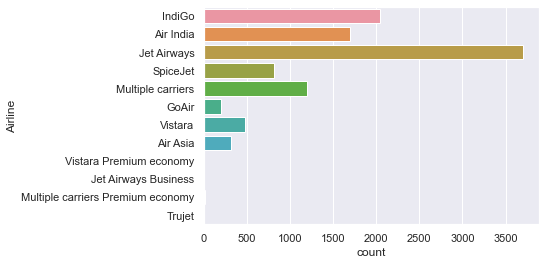

In [62]:
sns.countplot(y="Airline",data=df)
df["Airline"].value_counts()

Observations from the plot:

Airline company Jet Airways has the most no of flights running a total of 3700

We can say that Jet Airways, IndiGo, and Air India are the leading airline companies in India according to this data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(0, 1, 'Air India'),
  Text(0, 2, 'Jet Airways'),
  Text(0, 3, 'SpiceJet'),
  Text(0, 4, 'Multiple carriers'),
  Text(0, 5, 'GoAir'),
  Text(0, 6, 'Vistara'),
  Text(0, 7, 'Air Asia'),
  Text(0, 8, 'Vistara Premium economy'),
  Text(0, 9, 'Jet Airways Business'),
  Text(0, 10, 'Multiple carriers Premium economy'),
  Text(0, 11, 'Trujet')])

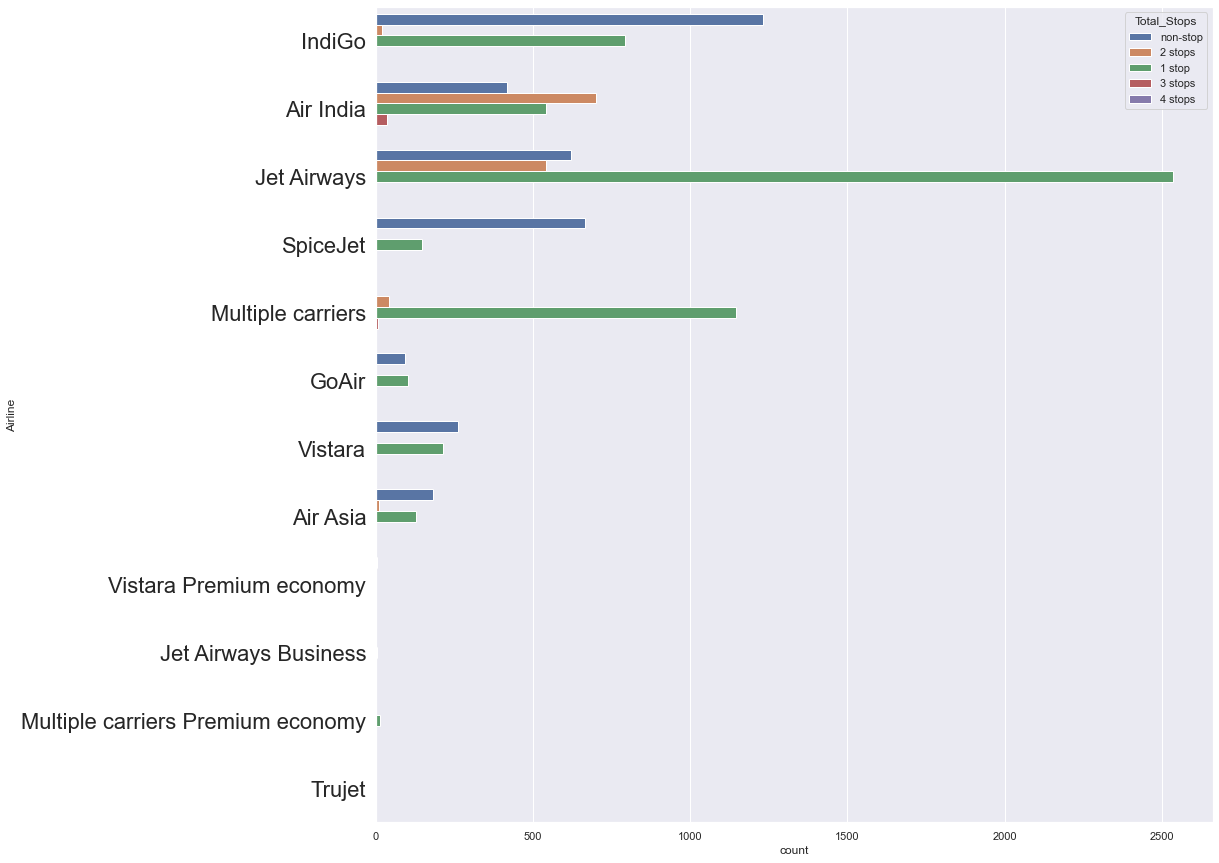

In [63]:
plt.figure(figsize=(15,15))
sns.countplot(y="Airline",hue="Total_Stops",data=df)
plt.yticks(size=22)

Observations from the plot:

Indigo airline is leading when it comes to no stops(No Halts)

We can assume that the longer the distance between source and Destination locations more the number of halts 

Jet Airways are having the highest number of one stops(only one halt throughout the journey)

We can say that GoAir, Vistara, and Air Asia are having a lower frequency of flights

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(0, 1, 'Air India'),
  Text(0, 2, 'Jet Airways'),
  Text(0, 3, 'SpiceJet'),
  Text(0, 4, 'Multiple carriers'),
  Text(0, 5, 'GoAir'),
  Text(0, 6, 'Vistara'),
  Text(0, 7, 'Air Asia'),
  Text(0, 8, 'Vistara Premium economy'),
  Text(0, 9, 'Jet Airways Business'),
  Text(0, 10, 'Multiple carriers Premium economy'),
  Text(0, 11, 'Trujet')])

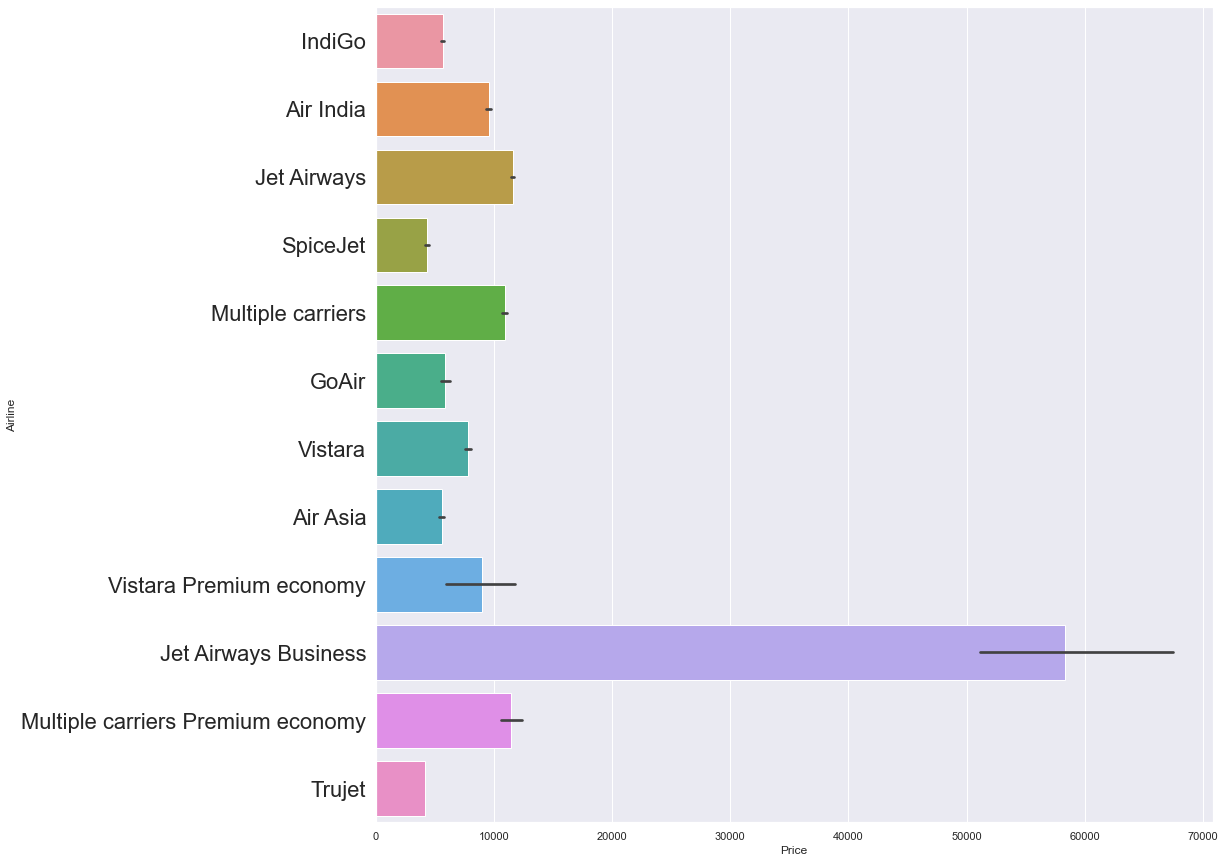

In [64]:
plt.figure(figsize=(15,15))
sns.barplot(y="Airline",x="Price",data=df)
plt.yticks(size=22)

Observations from the plot:

Jet Airways Business class is the most Expensive Airline

Indigo, Airindia, and jet airways are somewhat economical

Only few people can afford Business class 

<AxesSubplot:xlabel='Price', ylabel='Airline'>

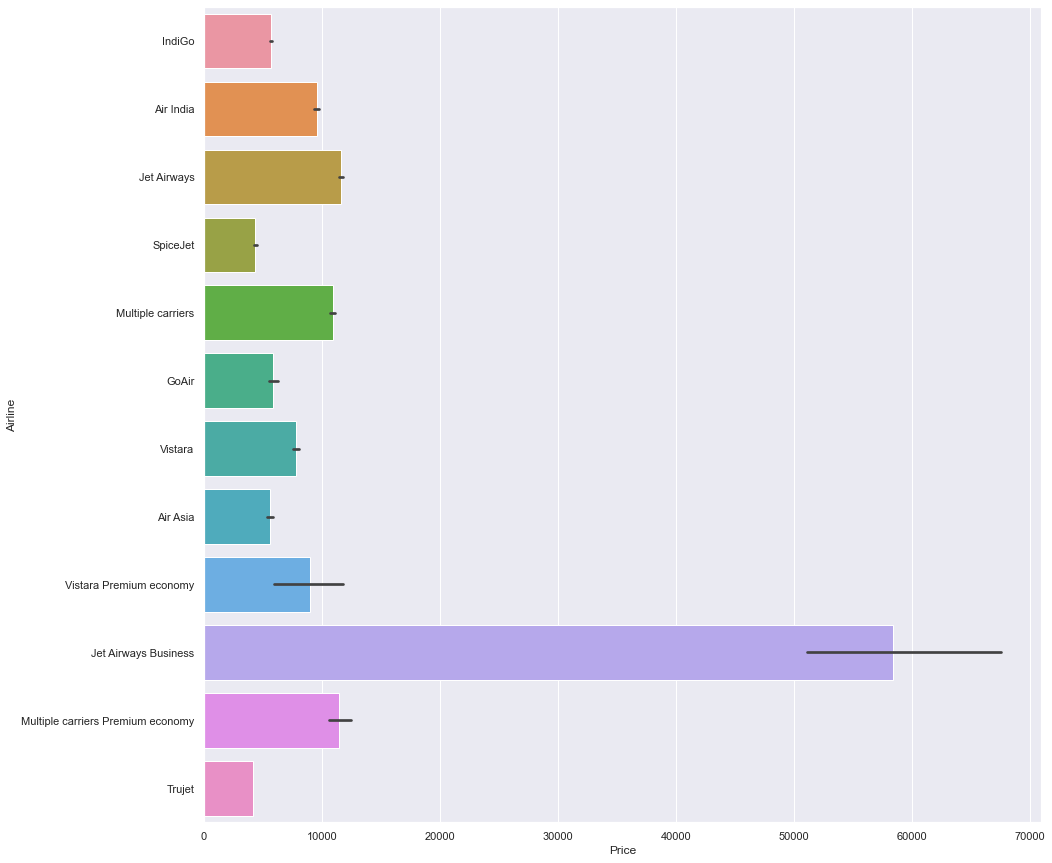

In [65]:
plt.figure(figsize=(15,15))
sns.barplot(y="Airline",x="Price",data=df)

Observations from the plot:

In terms of price the Jet Airways Business is the most expensive out of all other airlines

In [66]:
month=df.groupby('J_Month').mean()

In [67]:
month

,Price,J_day,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes
J_Month,,,,,,,,
3,10692.920060,13.873739,11.881210,26.688457,13.353754,26.735151,10.795667,28.556220
4,5766.545455,11.202226,12.820965,24.698516,13.350649,27.411874,5.763451,31.989796
5,9029.239764,15.098380,12.840943,23.020619,13.454197,24.114875,10.729308,27.815906
6,8736.152522,12.192993,12.477197,23.874962,13.358200,22.825430,10.073996,27.111145


(array([2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

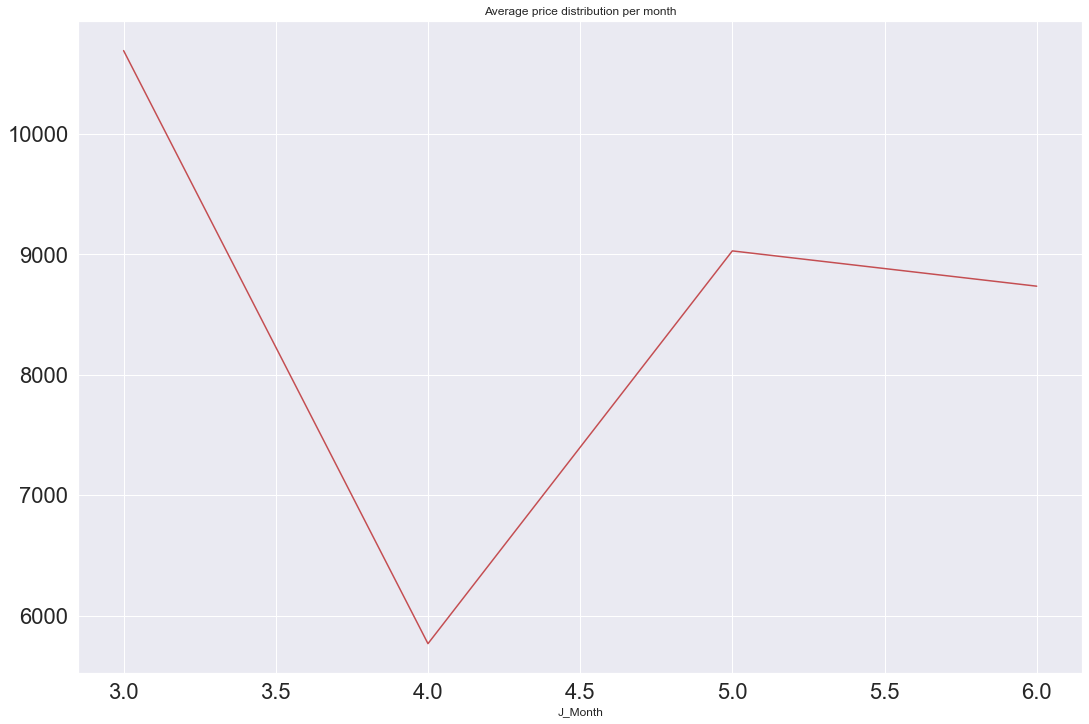

In [68]:
plt.figure(figsize=(18,12))
month['Price'].plot(color="r")
plt.title("Average price distribution per month")
plt.yticks(size=22)
plt.xticks(size=22)

Observations from the plot:

We have the data from the month of March - June

We can observe the above pattern, The prices are very high in early March may be due to some festive season

Prices are going down as month-end in March approaches 

Prices are economical till Mid April

Prices again go up in the month of May and are somewhat stable

In [69]:
day=df.groupby('J_day').mean()

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

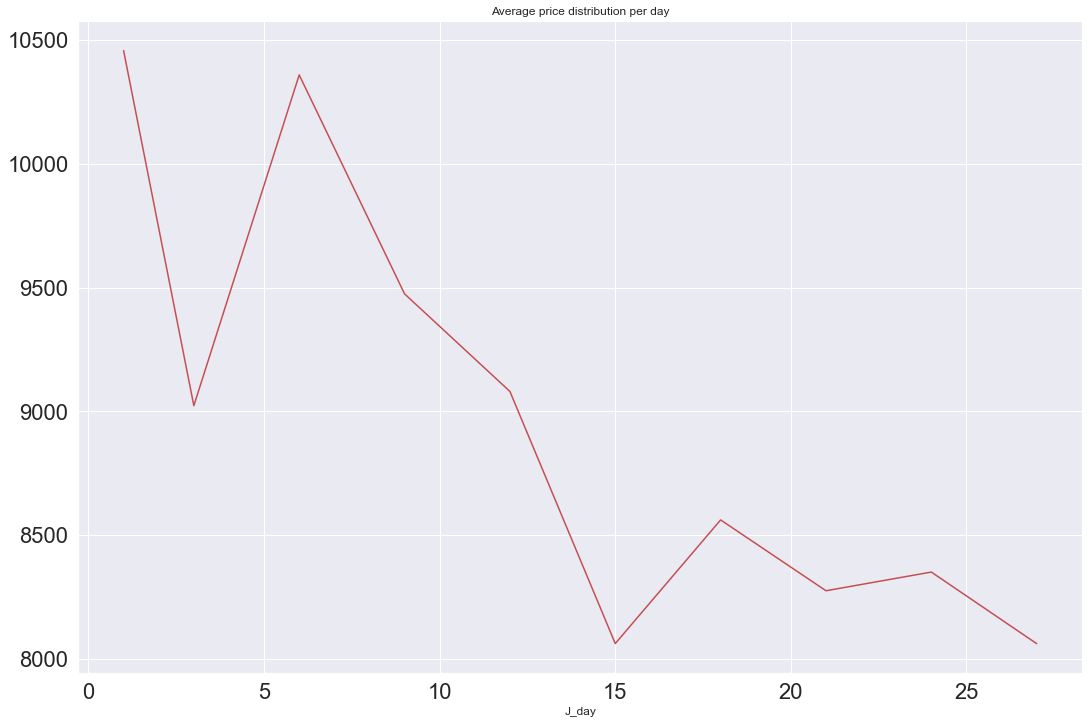

In [70]:
plt.figure(figsize=(18,12))
day['Price'].plot(color="r")
plt.title("Average price distribution per day")
plt.yticks(size=22)
plt.xticks(size=22)

Observations from the above plot:

If we observe the distribution per month prices are very high in the first two weeks and then by month-end the prices are slowly going down

<AxesSubplot:xlabel='count', ylabel='Source'>

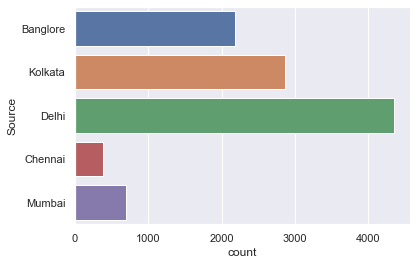

In [71]:
sns.countplot(y="Source",data=df)

Observations from the above plot:
    
When it comes to the source location most of the people are boarding from Delhi 

The least no of people are boarding from Chennai

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

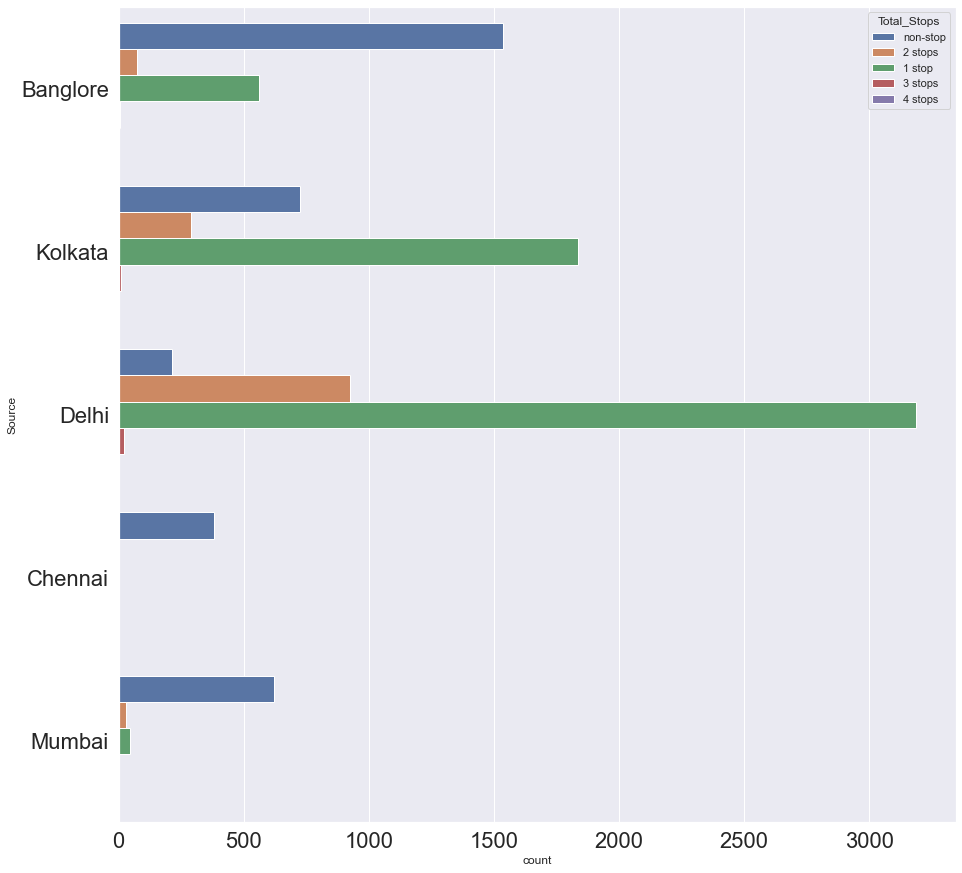

In [72]:
plt.figure(figsize=(15,15))
sns.countplot(y="Source",hue="Total_Stops",data=df)
plt.yticks(size=22)
plt.xticks(size=22)

Observations from the plot:

For all the people travelling from Banglore, in most cases, the flight will have no halts(non - stop) 

The people travelling from Delhi will have the most number of Halts

All the people travelling from Chennai will only have non stop flights(no halts)

<AxesSubplot:xlabel='Price', ylabel='Source'>

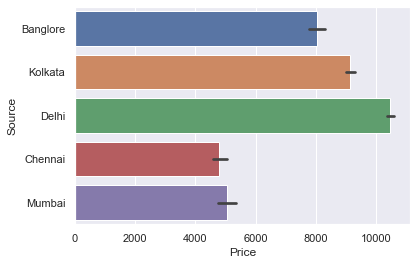

In [73]:
sns.barplot(y="Source",x="Price",data=df)

Observations from the plot:

All the people traveling from Delhi and Kolkata are having higher ticket prices

All the people traveling from Chennai are having lower ticket prices

<AxesSubplot:xlabel='count', ylabel='Destination'>

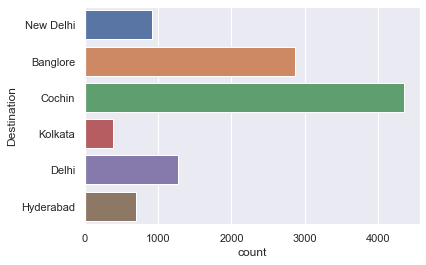

In [74]:
sns.countplot(y="Destination",data=df)

Observations from the above plot:

The highest number of people are traveling to Cochin

The least number of people are traveling to Kolkata

<AxesSubplot:xlabel='Duration_Hours', ylabel='Airline'>

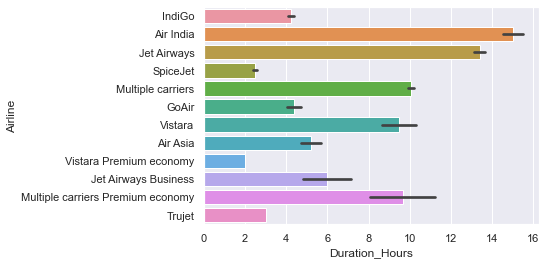

In [75]:
sns.barplot(x="Duration_Hours",y="Airline",data=df)

Observations from the Above plot:

Air India is having the highest flight duration in terms of (Hours) i.e when people are traveling to a foreign country.

So when traveling abroad most of the people are choosing either air India or jet airways

In [76]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Data Cleaning

In [77]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Price               0
J_day               0
J_Month             0
D_Hour              0
D_Min               0
A_Hour              0
A_Min               0
Duration_Hours      0
Duration_Minutes    0
dtype: int64

No missing values in data

### Outliers

In [78]:
from scipy import stats

# creating function to count outliers

def outliers(cname):
    Q1 = df[cname].quantile(0.25)
    Q3 = df[cname].quantile(0.75)
    IQR = stats.iqr(df[cname])
    print('The first quartile :',Q1,'for',cname)
    print('The third quartile :',Q3,'for',cname)
    print('The IQR :', IQR,'for',cname)
    
    L_outlier = Q1 - 1.5*(Q3 - Q1)  
    U_outlier = Q3 + 1.5*(Q3 - Q1)

    print('The left outlier :',L_outlier,'for',cname)
    print('The Right outlier :',U_outlier,'for',cname)
    
    print("Left Outliers :",df[df[cname] < L_outlier][cname].count())
    print("Right Outliers :",df[df[cname] > U_outlier][cname].count())

In [79]:
df_continuous = df[['Price', 'J_day', 'J_Month', 'D_Hour', 'D_Min',
       'A_Hour', 'A_Min', 'Duration_Hours', 'Duration_Minutes']]

In [80]:
df_continuous.head()

,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes
0,3897,24,3,22,20,1,10,2,50
1,7662,1,5,5,50,13,15,7,25
2,13882,9,6,9,25,4,25,19,0
3,6218,12,5,18,5,23,30,5,25
4,13302,1,3,16,50,21,35,4,45


In [81]:
df_categorical = df.drop(['Price', 'J_day', 'J_Month', 'D_Hour', 'D_Min',
       'A_Hour', 'A_Min', 'Duration_Hours', 'Duration_Minutes'],axis=1)

In [82]:
df_categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


Boxplot on continuous variables

<AxesSubplot:>

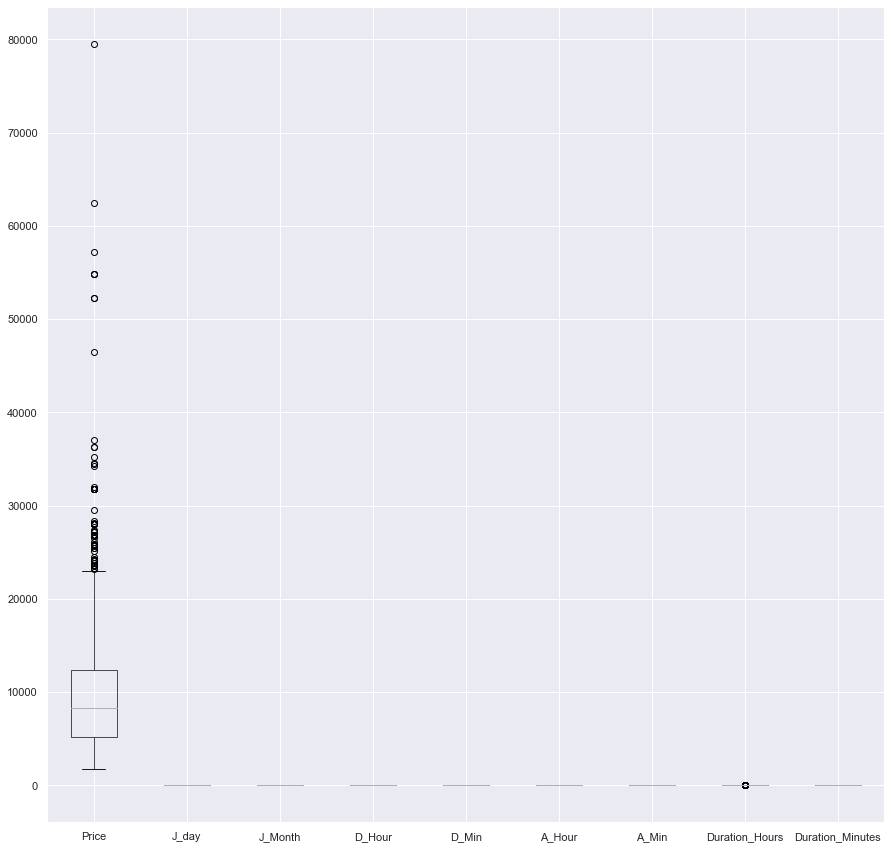

In [83]:
plt.figure(figsize=(15,15))
df_continuous.boxplot()

Some outliers in price and Duration Hours

In [84]:
outliers("Price")

The first quartile : 5224.0 for Price
The third quartile : 12341.0 for Price
The IQR : 7117.0 for Price
The left outlier : -5451.5 for Price
The Right outlier : 23016.5 for Price
Left Outliers : 0
Right Outliers : 94


In [85]:
df["Price"].describe()

count    10461.000000
mean      9025.996845
std       4624.358456
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12341.000000
max      79512.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price'>

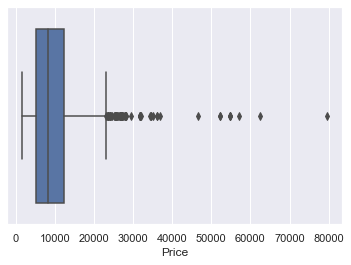

In [86]:
sns.boxplot(x="Price",data=df)

Some Outliers in Price

The first quartile : 2.0 for Duration_Hours
The third quartile : 15.0 for Duration_Hours
The IQR : 13.0 for Duration_Hours
The left outlier : -17.5 for Duration_Hours
The Right outlier : 34.5 for Duration_Hours
Left Outliers : 0
Right Outliers : 67


<AxesSubplot:xlabel='Duration_Hours'>

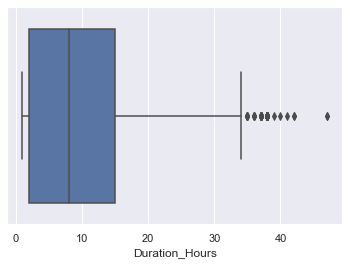

In [87]:
outliers("Duration_Hours")

df["Duration_Hours"].describe()

sns.boxplot(x="Duration_Hours",data=df)

## Removing Outliers

#### Z score technique

In [88]:
from scipy.stats import zscore

In [89]:
z = np.abs(zscore(df_continuous))

In [90]:
z.shape

(10461, 9)

In [91]:
threshhold = 3
print(np.where(z > 3))

(array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
         784,   825,   935,   945,   958,   965,   968,   974,  1065,
        1111,  1194,  1244,  1339,  1344,  1420,  1438,  1462,  1474,
        1492,  1547,  1625,  1650,  1653,  1778,  1784,  1797,  1909,
        2044,  2087,  2096,  2160,  2483,  2540,  2543,  2604,  2621,
        2627,  2640,  2677,  2701,  2904,  3010,  3088,  3231,  3372,
        3505,  3667,  3755,  3780,  3929,  3974,  4008,  4078,  4418,
        4476,  4606,  4627,  4779,  4960,  5080,  5312,  5378,  5451,
        5597,  5636,  5636,  5645,  5646,  5654,  5673,  5680,  5717,
        5789,  5864,  5884,  5916,  5988,  6014,  6240,  6247,  6332,
        6398,  6496,  6508,  6525,  6901,  7095,  7137,  7209,  7232,
        7253,  7258,  7279,  7437,  7453,  7454,  7510,  7515,  7608,
        7619,  7649,  7768,  7794,  7798,  7909,  7967,  8012,  8038,
        8284,  8287,  8325,  8344,  8408,  8466,  8469,  8488,  8560,
        8591,  8716

In [92]:
df_new = df[(z < 3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(10461, 15)
(10306, 15)


### Percentage data loss 

In [93]:
loss = (10461-10306)/10461*100

In [94]:
print("The data loss is ",loss," %")

The data loss is  1.4816939107159928  %


Considering the amount of data and outliers we can go ahead with only 1% data loss

In [95]:
df = df_new

In [96]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [97]:
df_continuous = df[['Price', 'J_day', 'J_Month', 'D_Hour', 'D_Min',
       'A_Hour', 'A_Min', 'Duration_Hours', 'Duration_Minutes']]

df_categorical = df.drop(['Price', 'J_day', 'J_Month', 'D_Hour', 'D_Min',
       'A_Hour', 'A_Min', 'Duration_Hours', 'Duration_Minutes'],axis=1)

In [98]:
df_continuous.head()

,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes
0,3897,24,3,22,20,1,10,2,50
1,7662,1,5,5,50,13,15,7,25
2,13882,9,6,9,25,4,25,19,0
3,6218,12,5,18,5,23,30,5,25
4,13302,1,3,16,50,21,35,4,45


In [99]:
df_categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


## Skewness in Continuous variables

In [100]:
df_continuous.skew()

Price               0.443422
J_day               0.115310
J_Month            -0.405607
D_Hour              0.099274
D_Min               0.176220
A_Hour             -0.371830
A_Min               0.107500
Duration_Hours      0.806156
Duration_Minutes   -0.091713
dtype: float64

### Considering skewness range between (-50,+50)

we need to reduce skewness in duration hours

##### Log Transformation

In [101]:
df_continuous["Duration_Hours"] = np.log(df_continuous["Duration_Hours"]+1)

In [102]:
df_continuous["Duration_Hours"].skew()

-0.0783254228508293

In [103]:
df_continuous.skew()

Price               0.443422
J_day               0.115310
J_Month            -0.405607
D_Hour              0.099274
D_Min               0.176220
A_Hour             -0.371830
A_Min               0.107500
Duration_Hours     -0.078325
Duration_Minutes   -0.091713
dtype: float64

SKewness has been reduced in all the continuous columns

### Encoding

In [104]:
df_categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


Droping the Route column 

In [105]:
df_categorical = df_categorical.drop("Route",axis=1)

In [106]:
df_categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,non-stop,No info
1,Air India,Kolkata,Banglore,2 stops,No info
2,Jet Airways,Delhi,Cochin,2 stops,No info
3,IndiGo,Kolkata,Banglore,1 stop,No info
4,IndiGo,Banglore,New Delhi,1 stop,No info


In [107]:
df_categorical = pd.get_dummies(data=df_categorical,drop_first=True)

In [108]:
df_categorical.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [109]:
df_categorical.shape

(10306, 29)

In [110]:
df = pd.concat([df_continuous,df_categorical],axis=1)

In [111]:
df.head() 

,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,3897,24,3,22,20,1,10,1.098612,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,7662,1,5,5,50,13,15,2.079442,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,13882,9,6,9,25,4,25,2.995732,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,6218,12,5,18,5,23,30,1.791759,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,13302,1,3,16,50,21,35,1.609438,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [112]:
df.shape

(10306, 38)

### Correlation

In [113]:
cor = df.corr()

<AxesSubplot:>

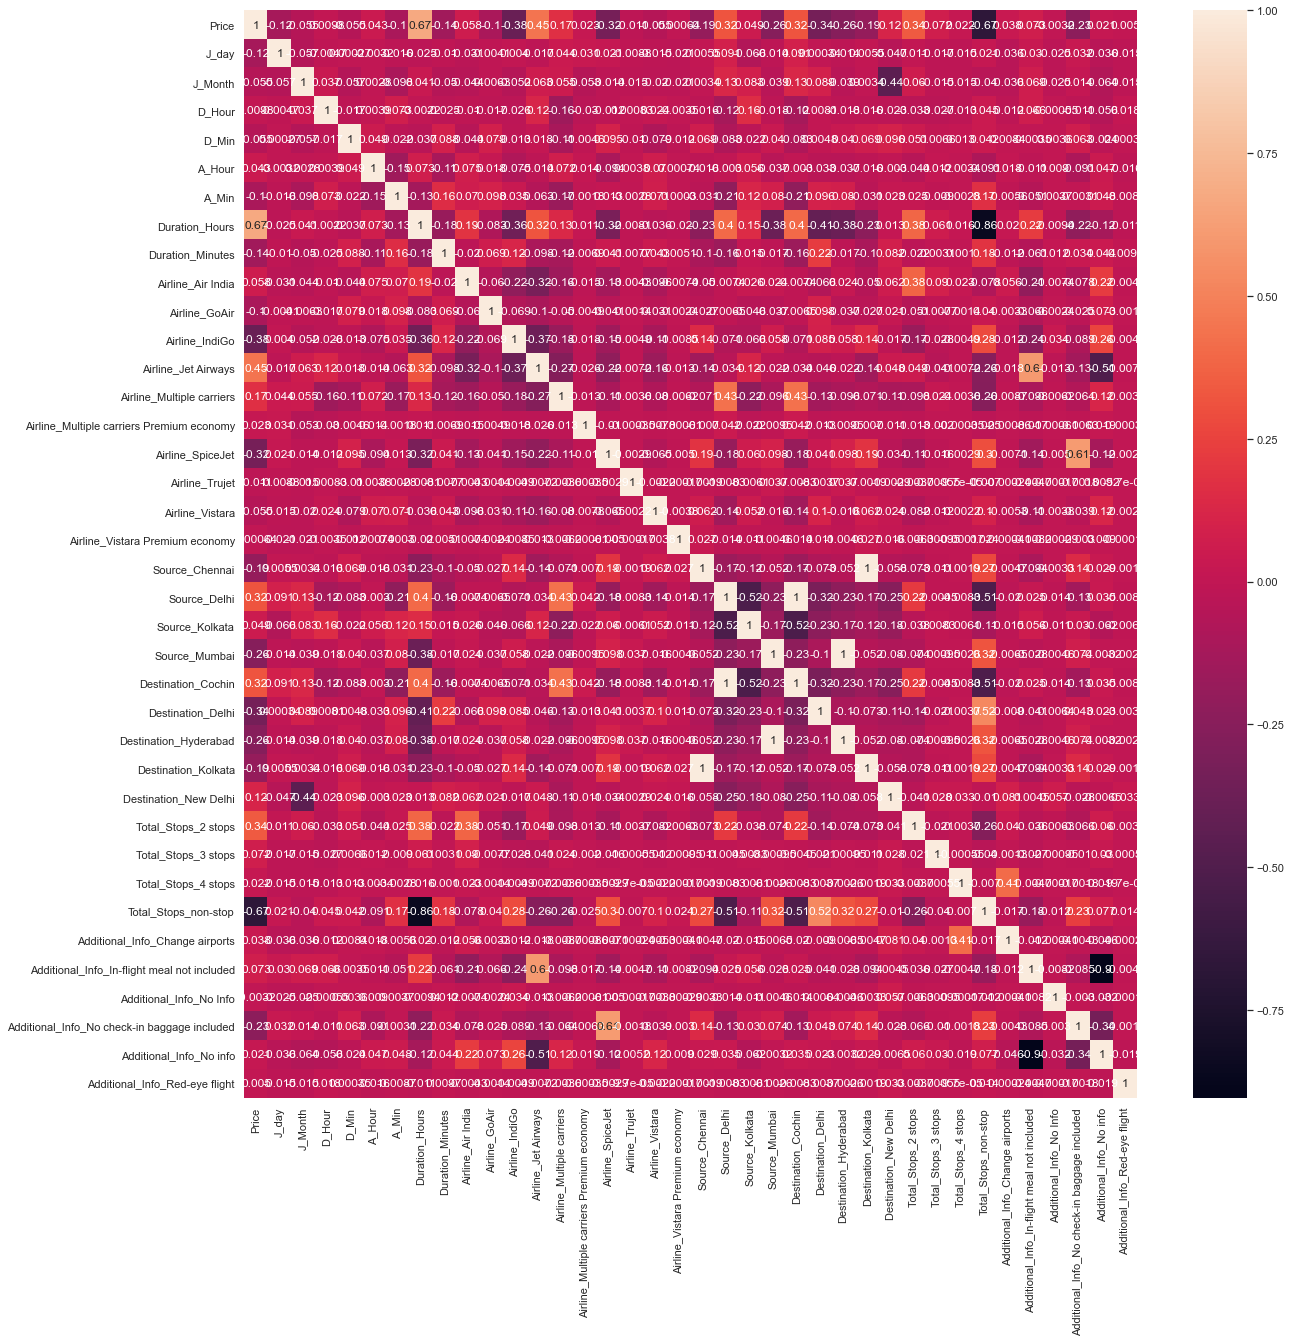

In [114]:
plt.figure(figsize=(20,20))
sns.heatmap(data=cor,annot=True)

We cannot clearly observe the correlation from the plot so lets create a table

In [115]:
cor["Price"].sort_values(ascending=False)

Price                                           1.000000
Duration_Hours                                  0.673166
Airline_Jet Airways                             0.447530
Total_Stops_2 stops                             0.341489
Destination_Cochin                              0.322894
Source_Delhi                                    0.322894
Airline_Multiple carriers                       0.172330
Destination_New Delhi                           0.115126
Additional_Info_In-flight meal not included     0.072966
Total_Stops_3 stops                             0.072098
Airline_Air India                               0.058335
Source_Kolkata                                  0.048975
A_Hour                                          0.043101
Additional_Info_Change airports                 0.038289
Airline_Multiple carriers Premium economy       0.022829
Total_Stops_4 stops                             0.021532
Additional_Info_No info                         0.021042
D_Hour                         

Duration_Hours ,Airline_Jet Airways ,Total_Stops_2 stops are some of the variables which are having high correlation with the target variable  

## Train Test Split

In [116]:
df.head()

,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,3897,24,3,22,20,1,10,1.098612,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,7662,1,5,5,50,13,15,2.079442,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,13882,9,6,9,25,4,25,2.995732,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,6218,12,5,18,5,23,30,1.791759,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,13302,1,3,16,50,21,35,1.609438,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [117]:
X = df.drop("Price",axis=1)
y = df["Price"]

In [118]:
X.head()

,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,24,3,22,20,1,10,1.098612,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,1,5,5,50,13,15,2.079442,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,9,6,9,25,4,25,2.995732,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,12,5,18,5,23,30,1.791759,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,3,16,50,21,35,1.609438,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [119]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [120]:
X = X.values
y = y.values

In [121]:
X

array([[24.,  3., 22., ...,  0.,  1.,  0.],
       [ 1.,  5.,  5., ...,  0.,  1.,  0.],
       [ 9.,  6.,  9., ...,  0.,  1.,  0.],
       ...,
       [27.,  4.,  8., ...,  0.,  1.,  0.],
       [ 1.,  3., 11., ...,  0.,  1.,  0.],
       [ 9.,  5., 10., ...,  0.,  1.,  0.]])

In [122]:
y

array([ 3897,  7662, 13882, ...,  7229, 12648, 11753], dtype=int64)

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [125]:
X_train.shape

(7729, 37)

In [126]:
y_train.shape

(7729,)

In [127]:
X_test.shape

(2577, 37)

In [128]:
y_test.shape

(2577,)

## Scaling

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
sc =MinMaxScaler()

In [131]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [132]:
X_train

array([[0.30769231, 0.66666667, 0.34782609, ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.66666667, 0.86956522, ..., 0.        , 0.        ,
        0.        ],
       [0.88461538, 0.66666667, 0.82608696, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.76923077, 0.        , 0.47826087, ..., 0.        , 1.        ,
        0.        ],
       [0.07692308, 0.        , 0.2173913 , ..., 0.        , 1.        ,
        0.        ],
       [0.65384615, 0.66666667, 0.47826087, ..., 0.        , 1.        ,
        0.        ]])

In [133]:
X_test

array([[0.76923077, 0.        , 0.82608696, ..., 0.        , 0.        ,
        0.        ],
       [0.07692308, 1.        , 0.26086957, ..., 0.        , 1.        ,
        0.        ],
       [0.19230769, 0.        , 0.47826087, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.53846154, 1.        , 0.30434783, ..., 0.        , 1.        ,
        0.        ],
       [0.42307692, 0.66666667, 0.95652174, ..., 0.        , 1.        ,
        0.        ],
       [0.19230769, 0.66666667, 0.39130435, ..., 0.        , 1.        ,
        0.        ]])

# Machine Learning

#### Linear Regression

In [134]:
from sklearn.metrics import r2_score

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_1 = LinearRegression() 
    mod_1.fit(X_train,y_train)
    train_score_1 = mod_1.score(X_train,y_train)
    pred_1 = mod_1.predict(X_test)
    test_score_1 = r2_score(y_test,pred_1)
    
    print("for random state ",i," The training accuracy is :",train_score_1)
    print("for random state ",i," The testing accuracy is :",test_score_1)
    print("\n")

for random state  0  The training accuracy is : 0.7150555707559992
for random state  0  The testing accuracy is : 0.7075408755367724


for random state  1  The training accuracy is : 0.717629084411042
for random state  1  The testing accuracy is : 0.6998356927859848


for random state  2  The training accuracy is : 0.7156822133629637
for random state  2  The testing accuracy is : 0.7052134383413573


for random state  3  The training accuracy is : 0.71253555615851
for random state  3  The testing accuracy is : 0.7149608112376624


for random state  4  The training accuracy is : 0.7093993816840547
for random state  4  The testing accuracy is : 0.7250890330584248


for random state  5  The training accuracy is : 0.7219248079494032
for random state  5  The testing accuracy is : 0.6872537163779655


for random state  6  The training accuracy is : 0.7143201466514382
for random state  6  The testing accuracy is : 0.710197644004549


for random state  7  The training accuracy is : 0.712714214

for random state  62  The training accuracy is : 0.7128261202829574
for random state  62  The testing accuracy is : 0.7142480227104107


for random state  63  The training accuracy is : 0.7128382437390453
for random state  63  The testing accuracy is : 0.7141773301826266


for random state  64  The training accuracy is : 0.7119441561589059
for random state  64  The testing accuracy is : 0.7172688509631169


for random state  65  The training accuracy is : 0.7138680765924843
for random state  65  The testing accuracy is : 0.7103144397611879


for random state  66  The training accuracy is : 0.7131209333522466
for random state  66  The testing accuracy is : 0.7131049851572391


for random state  67  The training accuracy is : 0.7105885803845013
for random state  67  The testing accuracy is : 0.7205304183573742


for random state  68  The training accuracy is : 0.7167131229532917
for random state  68  The testing accuracy is : 0.7030986535602215


for random state  69  The training accura

In [138]:
# Taking best random state as 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
mod_1 = LinearRegression() 
mod_1.fit(X_train,y_train)
train_score_1 = mod_1.score(X_train,y_train)
pred_1 = mod_1.predict(X_test)
test_score_1 = r2_score(y_test,pred_1)
    
print("The training accuracy is :",train_score_1)
print("The testing accuracy is :",test_score_1)
print("\n")

The training accuracy is : 0.71253555615851
The testing accuracy is : 0.7149608112376624




In [139]:
from sklearn.metrics import mean_squared_error
MSE_1 = mean_squared_error(y_test,pred_1)
print(MSE_1)

4631554.937068454


## Cross validation 

In [140]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_1,X,y,cv=kfold)

kfold_accuracy_LR = np.mean(abs(K_results))

In [141]:
kfold_accuracy_LR

0.7106545896864962

In [142]:
score = {"Algorithm":["Linear Regression"],
         "Training_Acc":[train_score_1],
        "R2 Score":[test_score_1],
         "MSE":[MSE_1],
        "Cross_validation":[kfold_accuracy_LR]}

final_card = pd.DataFrame(score)

In [143]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.712536,0.714961,4.631555e+06,0.710655


### Random Forest Regression

In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_2 = RandomForestRegressor() 
    mod_2.fit(X_train,y_train)
    train_score_2 = mod_2.score(X_train,y_train)
    pred_2 = mod_2.predict(X_test)
    test_score_2 = r2_score(y_test,pred_2)
    
    print("for random state ",i," The training accuracy is :",train_score_2)
    print("for random state ",i," The testing accuracy is :",test_score_2)
    print("\n")

for random state  0  The training accuracy is : 0.9848199140235947
for random state  0  The testing accuracy is : 0.9298162138701329


for random state  1  The training accuracy is : 0.9849158467763454
for random state  1  The testing accuracy is : 0.9156383113335428


for random state  2  The training accuracy is : 0.9850167868420368
for random state  2  The testing accuracy is : 0.9195063573545814


for random state  3  The training accuracy is : 0.9848669216044786
for random state  3  The testing accuracy is : 0.9185942282286148


for random state  4  The training accuracy is : 0.9859550044194264
for random state  4  The testing accuracy is : 0.9204280503327752


for random state  5  The training accuracy is : 0.9862666365891217
for random state  5  The testing accuracy is : 0.8988464938272402


for random state  6  The training accuracy is : 0.9855187385682113
for random state  6  The testing accuracy is : 0.918253678241076


for random state  7  The training accuracy is : 0.985205

for random state  61  The training accuracy is : 0.986310819046654
for random state  61  The testing accuracy is : 0.9107859630520527


for random state  62  The training accuracy is : 0.9851002899661565
for random state  62  The testing accuracy is : 0.9160442084360104


for random state  63  The training accuracy is : 0.9852835010671709
for random state  63  The testing accuracy is : 0.9184392242917129


for random state  64  The training accuracy is : 0.9857773383637713
for random state  64  The testing accuracy is : 0.9197348143562599


for random state  65  The training accuracy is : 0.9845349892527986
for random state  65  The testing accuracy is : 0.9203124605110119


for random state  66  The training accuracy is : 0.9859410083717564
for random state  66  The testing accuracy is : 0.9135026325451568


for random state  67  The training accuracy is : 0.9859939122965693
for random state  67  The testing accuracy is : 0.9201926943011303


for random state  68  The training accurac

In [146]:
# Taking the best random state as 49
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=49)
mod_2 = RandomForestRegressor() 
mod_2.fit(X_train,y_train)
train_score_2 = mod_2.score(X_train,y_train)
pred_2 = mod_2.predict(X_test)
test_score_2 = r2_score(y_test,pred_2)
    
print("The training accuracy is :",train_score_2)
print("The testing accuracy is :",test_score_2)
print("\n")

The training accuracy is : 0.9843792579030461
The testing accuracy is : 0.9367628286958666




In [147]:
MSE_2 = mean_squared_error(y_test,pred_2)
print(MSE_2)

1062884.5424946747


In [148]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_2,X,y,cv=kfold)

kfold_accuracy_RFR = np.mean(abs(K_results))

In [149]:
kfold_accuracy_RFR

0.9229779700900977

In [150]:
score = {"Algorithm":["Linear Regression","Random Forest Regression"],
         "Training_Acc":[train_score_1,train_score_2],
        "R2 Score":[test_score_1,test_score_2],
         "MSE":[MSE_1,MSE_2],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR]}

final_card = pd.DataFrame(score)

In [151]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.712536,0.714961,4.631555e+06,0.710655
1,Random Forest Regression,0.984379,0.936763,1.062885e+06,0.922978


### Gradient Bosting Regressor

In [152]:
from sklearn.ensemble import GradientBoostingRegressor

In [153]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_3 = GradientBoostingRegressor() 
    mod_3.fit(X_train,y_train)
    train_score_3 = mod_3.score(X_train,y_train)
    pred_3 = mod_3.predict(X_test)
    test_score_3 = r2_score(y_test,pred_3)
    
    print("for random state ",i," The training accuracy is :",train_score_3)
    print("for random state ",i," The testing accuracy is :",test_score_3)
    print("\n")

for random state  0  The training accuracy is : 0.8441741281770039
for random state  0  The testing accuracy is : 0.8279936100977064


for random state  1  The training accuracy is : 0.8395775482242813
for random state  1  The testing accuracy is : 0.8307483188190529


for random state  2  The training accuracy is : 0.8410206257741751
for random state  2  The testing accuracy is : 0.8283134631641337


for random state  3  The training accuracy is : 0.8402371339648691
for random state  3  The testing accuracy is : 0.8375590318283339


for random state  4  The training accuracy is : 0.8420472450686621
for random state  4  The testing accuracy is : 0.8371757165648531


for random state  5  The training accuracy is : 0.8461327605493117
for random state  5  The testing accuracy is : 0.8181879784777277


for random state  6  The training accuracy is : 0.8410289838979961
for random state  6  The testing accuracy is : 0.8321476565345618


for random state  7  The training accuracy is : 0.84342

for random state  61  The training accuracy is : 0.8465386506686935
for random state  61  The testing accuracy is : 0.8227927607065586


for random state  62  The training accuracy is : 0.8439798665631566
for random state  62  The testing accuracy is : 0.8343619285500679


for random state  63  The training accuracy is : 0.8440288222109957
for random state  63  The testing accuracy is : 0.8373456298058395


for random state  64  The training accuracy is : 0.8433319055412409
for random state  64  The testing accuracy is : 0.8335698821530482


for random state  65  The training accuracy is : 0.8467149688413151
for random state  65  The testing accuracy is : 0.831956616337695


for random state  66  The training accuracy is : 0.8462743036822702
for random state  66  The testing accuracy is : 0.8327223477560133


for random state  67  The training accuracy is : 0.8409853547627523
for random state  67  The testing accuracy is : 0.8363435400134585


for random state  68  The training accurac

In [154]:
# using the best random state as 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
mod_3 = GradientBoostingRegressor() 
mod_3.fit(X_train,y_train)
train_score_3 = mod_3.score(X_train,y_train)
pred_3 = mod_3.predict(X_test)
test_score_3 = r2_score(y_test,pred_3)
    
print("The training accuracy is :",train_score_3)
print("The testing accuracy is :",test_score_3)
print("\n")

The training accuracy is : 0.8402371339648692
The testing accuracy is : 0.8376320417777681




In [155]:
MSE_3 = mean_squared_error(y_test,pred_3)
print(MSE_3)

2638290.270861405


In [156]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_3,X,y,cv=kfold)

kfold_accuracy_GB = np.mean(abs(K_results))

In [157]:
kfold_accuracy_GB

0.8340475682899889

In [158]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                      "Gradient Boosting"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3],
        "R2 Score":[test_score_1,test_score_2,test_score_3],
         "MSE":[MSE_1,MSE_2,MSE_3],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB]}

final_card = pd.DataFrame(score)

In [159]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.712536,0.714961,4.631555e+06,0.710655
1,Random Forest Regression,0.984379,0.936763,1.062885e+06,0.922978
2,Gradient Boosting,0.840237,0.837632,2.638290e+06,0.834048


### ADA Boosting regressor

In [160]:
from sklearn.ensemble import AdaBoostRegressor

In [161]:
# using for loop to get best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_4 = AdaBoostRegressor() 
    mod_4.fit(X_train,y_train)
    train_score_4 = mod_4.score(X_train,y_train)
    pred_4 = mod_4.predict(X_test)
    test_score_4 = r2_score(y_test,pred_4)
    
    print("for random state ",i," The training accuracy is :",train_score_4)
    print("for random state ",i," The testing accuracy is :",test_score_4)
    print("\n")

for random state  0  The training accuracy is : 0.6679900880728638
for random state  0  The testing accuracy is : 0.6481374132509541


for random state  1  The training accuracy is : 0.65715080726097
for random state  1  The testing accuracy is : 0.6584744326379967


for random state  2  The training accuracy is : 0.6765184753296263
for random state  2  The testing accuracy is : 0.6637085733955168


for random state  3  The training accuracy is : 0.6763493925353712
for random state  3  The testing accuracy is : 0.6862231705279607


for random state  4  The training accuracy is : 0.6806666459621374
for random state  4  The testing accuracy is : 0.6830100527032139


for random state  5  The training accuracy is : 0.6895058506250444
for random state  5  The testing accuracy is : 0.6747957652794025


for random state  6  The training accuracy is : 0.6504065309753471
for random state  6  The testing accuracy is : 0.6369745567663412


for random state  7  The training accuracy is : 0.6532280

for random state  61  The training accuracy is : 0.6817607374979999
for random state  61  The testing accuracy is : 0.6701698134543921


for random state  62  The training accuracy is : 0.6531065131787073
for random state  62  The testing accuracy is : 0.6423325478248871


for random state  63  The training accuracy is : 0.6682621843718533
for random state  63  The testing accuracy is : 0.6566161923230482


for random state  64  The training accuracy is : 0.682091549653961
for random state  64  The testing accuracy is : 0.6707393150947252


for random state  65  The training accuracy is : 0.6748151149196603
for random state  65  The testing accuracy is : 0.6592790855795703


for random state  66  The training accuracy is : 0.6742961732317638
for random state  66  The testing accuracy is : 0.648924028606485


for random state  67  The training accuracy is : 0.6872949837360556
for random state  67  The testing accuracy is : 0.684587959419654


for random state  68  The training accuracy 

In [162]:
# Taking the best random state as 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
mod_4 = AdaBoostRegressor() 
mod_4.fit(X_train,y_train)
train_score_4 = mod_4.score(X_train,y_train)
pred_4 = mod_4.predict(X_test)
test_score_4 = r2_score(y_test,pred_4)
    
print("The training accuracy is :",train_score_4)
print("The testing accuracy is :",test_score_4)
print("\n")

The training accuracy is : 0.6507895705991418
The testing accuracy is : 0.6382829042699765




In [163]:
MSE_4 = mean_squared_error(y_test,pred_4)
print(MSE_4)

5979553.952936683


In [164]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_4,X,y,cv=kfold)

kfold_accuracy_ADA = np.mean(abs(K_results))

In [165]:
kfold_accuracy_ADA

0.6563535399898213

In [166]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA]}

final_card = pd.DataFrame(score)

In [167]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.712536,0.714961,4.631555e+06,0.710655
1,Random Forest Regression,0.984379,0.936763,1.062885e+06,0.922978
2,Gredient Boosting,0.840237,0.837632,2.638290e+06,0.834048
3,ADA Boost,0.650790,0.638283,5.979554e+06,0.656354


### KNN Regressor

In [168]:
from sklearn.neighbors import KNeighborsRegressor

In [169]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_5 = KNeighborsRegressor() 
    mod_5.fit(X_train,y_train)
    train_score_5 = mod_5.score(X_train,y_train)
    pred_5 = mod_5.predict(X_test)
    test_score_5 = r2_score(y_test,pred_5)
    
    print("for random state ",i," The training accuracy is :",train_score_5)
    print("for random state ",i," The testing accuracy is :",test_score_5)
    print("\n")

for random state  0  The training accuracy is : 0.7297280675010367
for random state  0  The testing accuracy is : 0.5753067057775298


for random state  1  The training accuracy is : 0.7342137993129345
for random state  1  The testing accuracy is : 0.5493148377173598


for random state  2  The training accuracy is : 0.7299222669193197
for random state  2  The testing accuracy is : 0.5533113960994263


for random state  3  The training accuracy is : 0.7291990137994584
for random state  3  The testing accuracy is : 0.5888502207542903


for random state  4  The training accuracy is : 0.7204440202631268
for random state  4  The testing accuracy is : 0.5827401618976655


for random state  5  The training accuracy is : 0.7341303286999026
for random state  5  The testing accuracy is : 0.5443419918663872


for random state  6  The training accuracy is : 0.7250336296294875
for random state  6  The testing accuracy is : 0.5673520900234423


for random state  7  The training accuracy is : 0.73209

for random state  61  The training accuracy is : 0.7339625723814593
for random state  61  The testing accuracy is : 0.5217841209173055


for random state  62  The training accuracy is : 0.7269550632106441
for random state  62  The testing accuracy is : 0.5712030697044382


for random state  63  The training accuracy is : 0.7284596216232915
for random state  63  The testing accuracy is : 0.5536431060329231


for random state  64  The training accuracy is : 0.7316862420697183
for random state  64  The testing accuracy is : 0.5458750669098851


for random state  65  The training accuracy is : 0.7217424566046566
for random state  65  The testing accuracy is : 0.5741152871565709


for random state  66  The training accuracy is : 0.7237864098432792
for random state  66  The testing accuracy is : 0.6042195551138259


for random state  67  The training accuracy is : 0.7348081567732212
for random state  67  The testing accuracy is : 0.5494522072376529


for random state  68  The training accura

In [170]:
# The best random state is 49
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=49)
mod_5 = KNeighborsRegressor() 
mod_5.fit(X_train,y_train)
train_score_5 = mod_5.score(X_train,y_train)
pred_5 = mod_5.predict(X_test)
test_score_5 = r2_score(y_test,pred_5)
    
print("The training accuracy is :",train_score_5)
print("The testing accuracy is :",test_score_5)
print("\n")

The training accuracy is : 0.7264733578250913
The testing accuracy is : 0.5918101688337765




In [171]:
MSE_5 = mean_squared_error(y_test,pred_5)
print(MSE_5)

6860817.032176949


In [172]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_5,X,y,cv=kfold)

kfold_accuracy_KNR = np.mean(abs(K_results))

In [173]:
kfold_accuracy_KNR

0.5890495574697239

In [174]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost",
                     "K Neighbor Regressor"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_5],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,kfold_accuracy_KNR]}

final_card = pd.DataFrame(score)

In [175]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.712536,0.714961,4.631555e+06,0.710655
1,Random Forest Regression,0.984379,0.936763,1.062885e+06,0.922978
2,Gredient Boosting,0.840237,0.837632,2.638290e+06,0.834048
3,ADA Boost,0.650790,0.638283,5.979554e+06,0.656354
4,K Neighbor Regressor,0.726473,0.591810,6.860817e+06,0.589050


### Bagging Regressor

In [176]:
from sklearn.ensemble import BaggingRegressor

In [177]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_6 = BaggingRegressor() 
    mod_6.fit(X_train,y_train)
    train_score_6 = mod_6.score(X_train,y_train)
    pred_6 = mod_6.predict(X_test)
    test_score_6 = r2_score(y_test,pred_6)
    
    print("for random state ",i," The training accuracy is :",train_score_6)
    print("for random state ",i," The testing accuracy is :",test_score_6)
    print("\n")

for random state  0  The training accuracy is : 0.9805226160286568
for random state  0  The testing accuracy is : 0.9243168140966888


for random state  1  The training accuracy is : 0.9800495323464703
for random state  1  The testing accuracy is : 0.898916631200162


for random state  2  The training accuracy is : 0.9794680536005008
for random state  2  The testing accuracy is : 0.9126665081949229


for random state  3  The training accuracy is : 0.980357945060909
for random state  3  The testing accuracy is : 0.9113965629710431


for random state  4  The training accuracy is : 0.9816630030218966
for random state  4  The testing accuracy is : 0.9113758751532117


for random state  5  The training accuracy is : 0.9821979530713656
for random state  5  The testing accuracy is : 0.8863024622302783


for random state  6  The training accuracy is : 0.9814286715730177
for random state  6  The testing accuracy is : 0.9114624649687366


for random state  7  The training accuracy is : 0.9811769

for random state  61  The training accuracy is : 0.9827751065162826
for random state  61  The testing accuracy is : 0.9058603107369028


for random state  62  The training accuracy is : 0.9798525483229998
for random state  62  The testing accuracy is : 0.912976737747029


for random state  63  The training accuracy is : 0.9808448533418835
for random state  63  The testing accuracy is : 0.9095941338274717


for random state  64  The training accuracy is : 0.9808085598865802
for random state  64  The testing accuracy is : 0.9140621554958759


for random state  65  The training accuracy is : 0.9805781399774592
for random state  65  The testing accuracy is : 0.9133681282224789


for random state  66  The training accuracy is : 0.9803368032020787
for random state  66  The testing accuracy is : 0.9052868422191761


for random state  67  The training accuracy is : 0.9817614580782942
for random state  67  The testing accuracy is : 0.9126138015832114


for random state  68  The training accurac

In [178]:
# The best random state is 83
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=83)
mod_6 = BaggingRegressor() 
mod_6.fit(X_train,y_train)
train_score_6 = mod_6.score(X_train,y_train)
pred_6 = mod_6.predict(X_test)
test_score_6 = r2_score(y_test,pred_6)
    
print("The training accuracy is :",train_score_6)
print("The testing accuracy is :",test_score_6)
print("\n")

The training accuracy is : 0.9803644284198655
The testing accuracy is : 0.911970071535002




In [179]:
MSE_6 = mean_squared_error(y_test,pred_6)
print(MSE_6)

1442991.7142516712


In [180]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_6,X,y,cv=kfold)

kfold_accuracy_BR = np.mean(abs(K_results))

In [181]:
kfold_accuracy_BR

0.9160760752336154

In [182]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost",
                     "K Neighbor Regressor","Bagging Regressor"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,kfold_accuracy_KNR,
                           kfold_accuracy_BR]}

final_card = pd.DataFrame(score)

In [183]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.712536,0.714961,4.631555e+06,0.710655
1,Random Forest Regression,0.984379,0.936763,1.062885e+06,0.922978
2,Gredient Boosting,0.840237,0.837632,2.638290e+06,0.834048
3,ADA Boost,0.650790,0.638283,5.979554e+06,0.656354
4,K Neighbor Regressor,0.726473,0.591810,6.860817e+06,0.589050
5,Bagging Regressor,0.980364,0.911970,1.442992e+06,0.916076


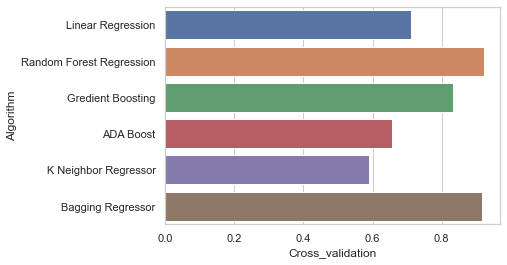

In [184]:
# Algorithm performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm",x="Cross_validation",data=final_card)

### From all the machine learning models Random Forest Regression is having the best results based upon cross validation scores

In [185]:
col = ['J_day', 'J_Month', 'D_Hour', 'D_Min', 'A_Hour', 'A_Min',
       'Duration_Hours', 'Duration_Minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight']

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

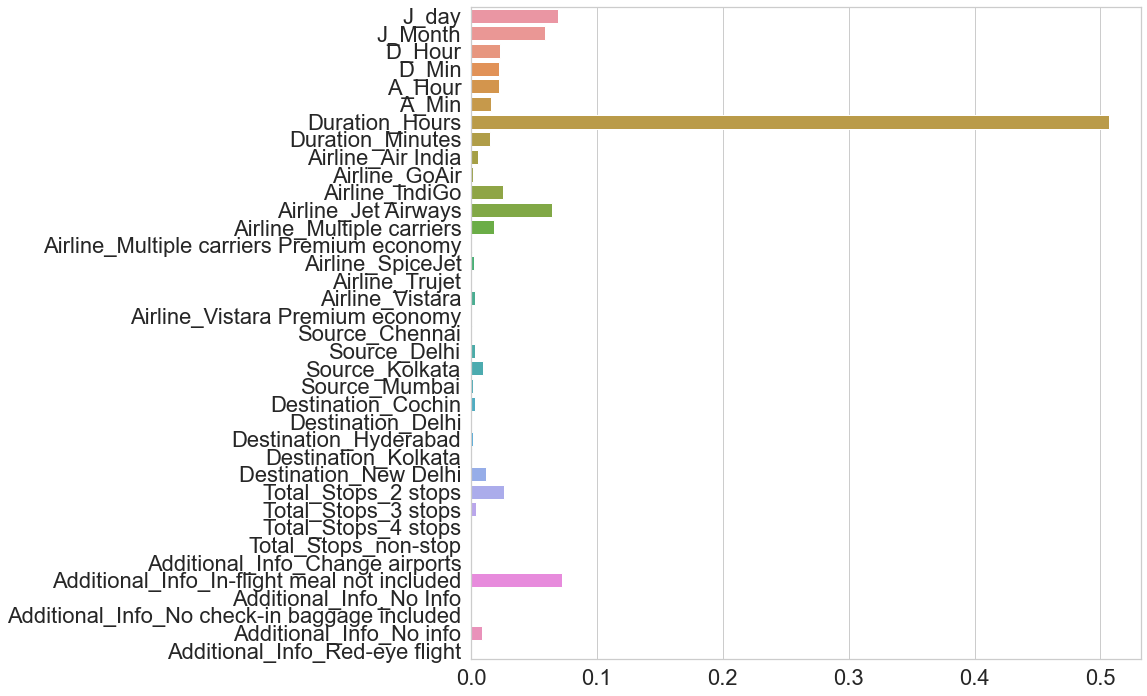

In [186]:
plt.figure(figsize=(12,12))
sns.barplot(y=col,x=mod_2.feature_importances_)
plt.yticks(size=22)
plt.xticks(size=22)

##### So we can clearly observe that  Duration_Hours is turning out to be the most useful feature in predicting the Prices of Flights

#### Hyperparametric Tuning

#### Grid Search CV

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
n_estimators = [100, 200, 300, 400]

max_features = ["auto","sqrt","log2"]

min_samples_leaf = [1, 2, 4]

criterion = ["mse","mae"]

#### Parameters for Random Forest Regression

In [189]:
parameters = {
    "n_estimators":n_estimators,
    "max_features":max_features,
    "min_samples_leaf":min_samples_leaf,
    "criterion":criterion
}

In [190]:
print(parameters)

{'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4], 'criterion': ['mse', 'mae']}


In [191]:
es = RandomForestRegressor()

In [192]:
grid_search=GridSearchCV(estimator=es,param_grid=parameters,cv=3,n_jobs=-1,verbose=2)

In [193]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 46.7min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

#### Best Estinators

In [194]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=400)

#### Best Parameters

In [195]:
grid_search.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 400}

#### Best Score

In [196]:
grid_search.best_score_

0.9090903456862242

In [197]:
predictions = grid_search.predict(X_test)

In [198]:
adjusted_r2 = 1 - (1-r2_score(y_test,predictions))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [199]:
from sklearn.metrics import explained_variance_score,mean_absolute_error

### Variance

In [200]:
variance = explained_variance_score(y_test,predictions)

### Mean Absolute Error

In [201]:
MAE = mean_absolute_error(y_test,predictions)

### Mean Square Error

In [202]:
MSE = mean_squared_error(y_test,predictions)

### Root Mean Square Error

In [203]:
RMSE = np.sqrt(MSE)

### Regression metrics

In [204]:
card = {
    "Train Score":[grid_search.score(X_train,y_train)],
    "R2 Score":[r2_score(y_test,predictions)],
    "Adjusted_r2":[adjusted_r2],
    "Explained_variance":[variance],
    "MAE":[MAE],
    "MSE":[MSE],
    "RMSE":[RMSE]
}

metrics = pd.DataFrame(card)

In [205]:
metrics

,Train Score,R2 Score,Adjusted_r2,Explained_variance,MAE,MSE,RMSE
0,0.985935,0.921061,0.919911,0.921133,602.844497,1.293966e+06,1137.526373


In [206]:
grid_search

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

### Saving the model

In [207]:
import pickle

In [208]:
with open("model_pickle","wb") as f:
    
    pickle.dump(grid_search,f)

In [209]:
with open("model_pickle","rb") as f:
    
    price = pickle.load(f)

### Conclusion

In [210]:
df.head()

,Price,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,3897,24,3,22,20,1,10,1.098612,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,7662,1,5,5,50,13,15,2.079442,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,13882,9,6,9,25,4,25,2.995732,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,6218,12,5,18,5,23,30,1.791759,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,13302,1,3,16,50,21,35,1.609438,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [211]:
# The model needs to predict something close to 13302
# for this inputs
df.iloc[2,0:].values

array([1.38820000e+04, 9.00000000e+00, 6.00000000e+00, 9.00000000e+00,
       2.50000000e+01, 4.00000000e+00, 2.50000000e+01, 2.99573227e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00])

In [212]:
price.predict(sc.transform([[9.00000000e+00, 6.00000000e+00, 9.00000000e+00,
       2.50000000e+01, 4.00000000e+00, 2.50000000e+01, 2.99573227e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00]]))

array([10448.82])

#### Model is predicting a close by value

#### scatterplot of the real test values versus the predicted values

Text(0, 0.5, 'Predicted Y')

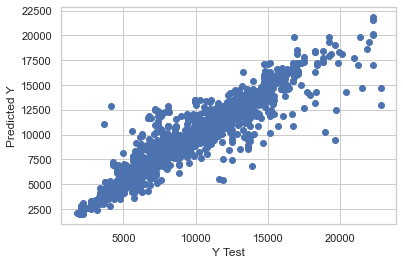

In [213]:
plt.scatter(y_test,predictions)

plt.xlabel('Y Test')

plt.ylabel('Predicted Y')

#### We can observe that when we plot the predicted values with the actual values we get a graph that looks some what linear in nature. which shows that the model is performing good

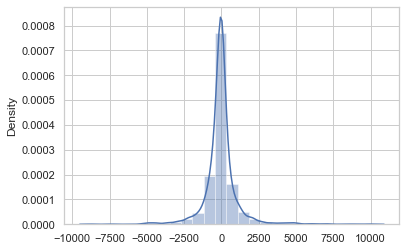

In [236]:
sns.distplot((y_test-predictions),bins=25);

### Ploting a histogram of the residuals to make sure it looks normally distributed

## Comparing Predicted values with Actual values

In [215]:
# Comparing predicted value vs actual value

print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[ 7201.0775  7298.    ]
 [ 3083.0775  3100.    ]
 [16279.215  18260.    ]
 ...
 [ 6469.5625  5462.    ]
 [ 3561.365   3898.    ]
 [ 9604.3025  9663.    ]]


#### We can observe that most of the predictions are close to the actual values

## Test Data

In [216]:
df_test = pd.read_excel("Test_set.xlsx")

In [217]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## We need to clean the data

In [218]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

## No null values in test data

### Cleaning the data using the following steps

In [219]:
# Droping duplicates
df_test = pd.DataFrame.drop_duplicates(df_test)

# We need to extract "Day" and "Month" from "Date_of_Journey" column and we need to convert the column from object datatype to pandas Date_time
df_test["J_day"] = pd.to_datetime(df_test["Date_of_Journey"], format="%d/%m/%Y").dt.day
df_test["J_Month"] = pd.to_datetime(df_test["Date_of_Journey"], format="%d/%m/%Y").dt.month

# Now lets drop the "Date_of_Journey" column as it is of no use
df_test = df_test.drop("Date_of_Journey",axis=1)

# Flight departure time and arrival time are important features we need to extract information like hours and minutes from it
df_test["D_Hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["D_Min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

# We have successfully extracted Hours and Minutes from "Dep_Time" now we can drop "Dep_Time" column
df_test = df_test.drop("Dep_Time",axis=1)

# With the help of split() method we will remove some of the month information from Arrival_Timein order to just get Hours and Minutes
df_test["Arrival_Time"] = df_test["Arrival_Time"].str.split().str[0]

# Flight arrival time is an important features we need to extract information like hours and minutes from it
df_test["A_Hour"] = pd.to_datetime(df_test["Arrival_Time"]).dt.hour
df_test["A_Min"] = pd.to_datetime(df_test["Arrival_Time"]).dt.minute

# We have successfully extracted arrival hour and minute from Arrival time. Now we need to drop arrival time
df_test = df_test.drop("Arrival_Time",axis=1)

# Making seprate columns for duration hours and duration minutes
df_test["Duration_Hours"] = df_test["Duration"].str.split().str[0]
df_test["Duration_Minutes"] = df_test["Duration"].str.split().str[1]

# Lets drop the original duration column
df_test = df_test.drop("Duration",axis=1)

# Using Split() method to remove "h" and "m" from data
df_test["Duration_Hours"] = df_test["Duration_Hours"].str.split("h").str[0]
df_test["Duration_Minutes"] = df_test["Duration_Minutes"].str.split("m").str[0]

In [220]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,NaN
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,NaN
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [221]:
df_test[df_test["Duration_Hours"] == "5m"]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,12,3,16,50,16,55,5m,NaN


In [222]:
df_test = df_test.drop([2660])

In [223]:
# converting into datatype int 
df_test["Duration_Hours"] = df_test["Duration_Hours"].astype(int) 
df_test["Duration_Minutes"] = df_test["Duration_Minutes"].replace(np.nan,"0")
df_test["Duration_Minutes"] = df_test["Duration_Minutes"].astype(int) 

In [224]:
df.shape

(10306, 38)

In [225]:
df_test = df_test.drop("Route",axis=1)

In [226]:
df_test = pd.get_dummies(data=df_test,drop_first=True)

In [227]:
df_test = df_test[['J_day', 'J_Month', 'D_Hour', 'D_Min', 'A_Hour', 'A_Min',
       'Duration_Hours', 'Duration_Minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet','Airline_Jet Airways Business',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Total_Stops_2 stops', 'Total_Stops_3 stops',
       'Total_Stops_4 stops', 'Total_Stops_non-stop','Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included','Additional_Info_No info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_Business class',
       ]]

In [228]:
df_test["Additional_Info_Red-eye flight"] = 0

In [229]:
df_test.shape

(2644, 37)

In [230]:
df.shape

(10306, 38)

In [231]:
df_test.head()

,J_day,J_Month,D_Hour,D_Min,A_Hour,A_Min,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Jet Airways Business,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No info,Additional_Info_No check-in baggage included,Additional_Info_Business class,Additional_Info_Red-eye flight
0,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,21,5,8,0,21,0,13,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [232]:
test_df = df_test.values

In [233]:
test_df

array([[ 6,  6, 17, ...,  0,  0,  0],
       [12,  5,  6, ...,  0,  0,  0],
       [21,  5, 19, ...,  0,  0,  0],
       ...,
       [ 6,  3, 21, ...,  0,  0,  0],
       [ 6,  3,  4, ...,  0,  0,  0],
       [15,  6,  4, ...,  0,  0,  0]], dtype=int64)

## Predicting Results

In [234]:
price.predict(test_df)

array([13997.5125,  7562.08  , 12898.    , ..., 16285.4175, 14589.5625,
        7299.8975])

In [3]:
df_test = ['J_day', 'J_Month', 'D_Hour', 'D_Min', 'A_Hour', 'A_Min',
       'Duration_Hours', 'Duration_Minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet','Airline_Jet Airways Business',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Total_Stops_2 stops', 'Total_Stops_3 stops',
       'Total_Stops_4 stops', 'Total_Stops_non-stop','Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included','Additional_Info_No info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_Business class',
       ]

In [4]:
len(df_test)

36

In [6]:
df_test[0]

'J_day'

In [7]:
boy = [1.38820000e+04, 9.00000000e+00, 6.00000000e+00, 9.00000000e+00,
       2.50000000e+01, 4.00000000e+00, 2.50000000e+01, 2.99573227e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00]

In [8]:
len(boy)

38